In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import cv2
import os
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = []
path = ['/content/drive/Shareddrives/IDP/Cycle GAN Implentation/2. Motion_blur_dataset_Jan_23/Patches filtered/Blank Patches', '/content/drive/Shareddrives/IDP/Cycle GAN Implentation/2. Motion_blur_dataset_Jan_23/Patches filtered/Blur_Patches']
for pth in path:
  for img in os.listdir(pth):
    try:
      img_arr = cv2.imread(os.path.join(pth,img))[...,::-1]
      data.append([img_arr, path.index(pth)])
    except Exception as e:
      print(e)
  #print(data.shape)

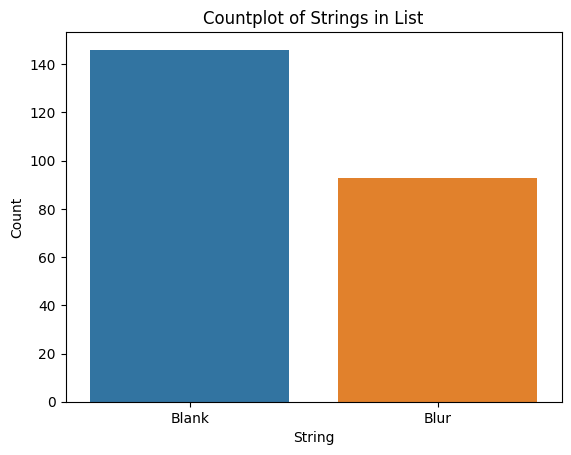

In [ ]:
l = []
for i in data:
  if(i[1]==0):
    l.append("Blank")
  else:
    l.append("Blur")

df = pd.DataFrame({'String': l})

# create a countplot of the strings in the dataframe
sns.countplot(data=df, x='String')

# set plot title and axis labels
plt.title('Countplot of Strings in List')
plt.xlabel('String')
plt.ylabel('Count')

# show the plot
plt.show()

Text(0.5, 1.0, 'Blank')

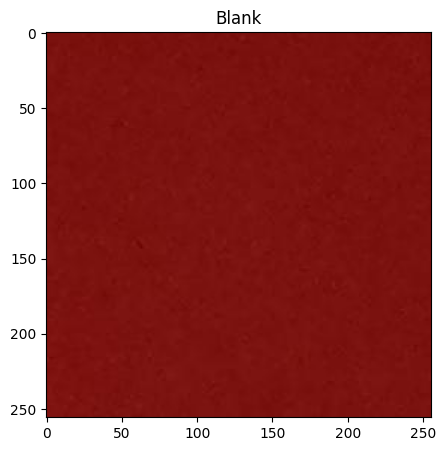

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(data[1][0])
plt.title('Blank')

Text(0.5, 1.0, 'Blur')

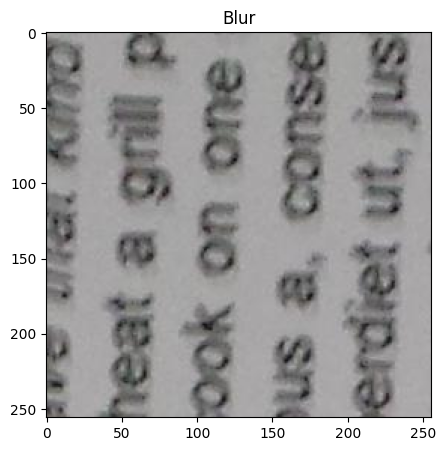

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(data[-1][0])
plt.title('Blur')

In [ ]:
df.value_counts()

String
Blank     146
Blur       93
dtype: int64

In [ ]:
test = np.array(data[131:146] + data[231:])
train = np.array(data[:131] + data[146:231])

<ipython-input-8-73ac16e0dbaa>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test = np.array(data[131:146] + data[231:])
<ipython-input-8-73ac16e0dbaa>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array(data[:131] + data[146:231])


In [ ]:
print(len(train), len(test), len(data))

216 23 239


In [ ]:
train.shape

(216, 2)

In [ ]:
img_size = 256
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

print(x_train.shape, len(y_train))
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)
print(x_train.shape, y_train.shape)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

(216, 256, 256, 3) 216
(216, 256, 256, 3) (216,)


In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train1)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

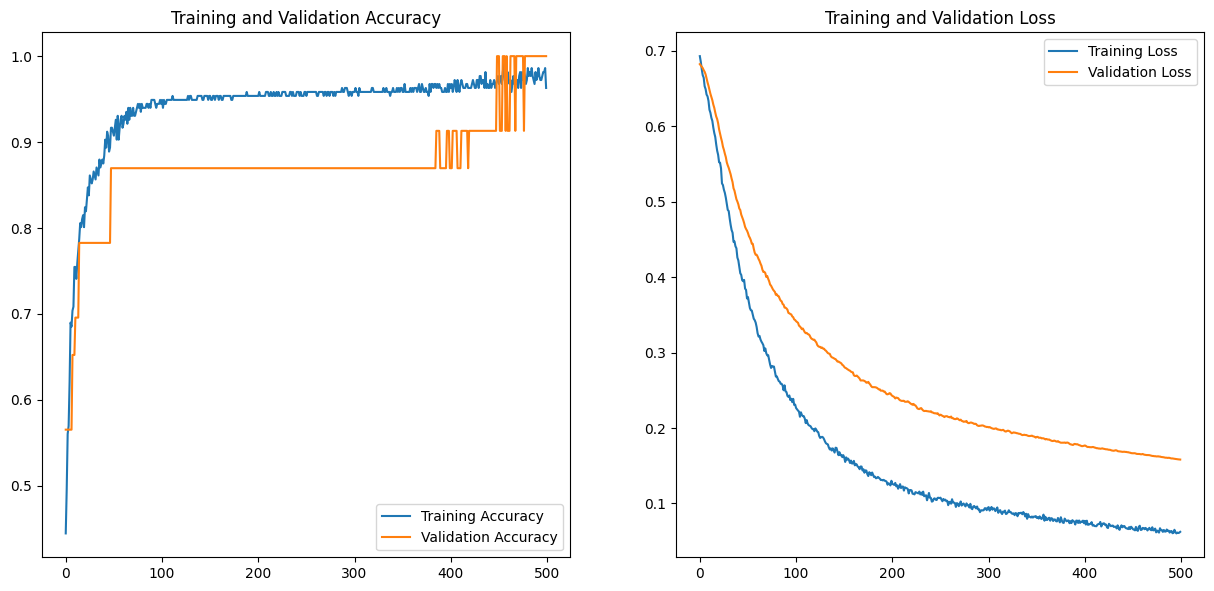

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("/content/drive/Shareddrives/IDP/Cycle GAN Implentation/2. Motion_blur_dataset_Jan_23/Patches filtered/MB_text_blank_classifier.h5")

In [ ]:
predictions = model.predict(x_val)

In [ ]:
(np.round(predictions[:,0])).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
#predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, np.round(predictions[:,1]).astype(int), target_names = ['Blank (Class 0)','Text (Class 1)']))

In [ ]:
from keras.models import load_model as lm
model1 = lm.load("/content/drive/Shareddrives/IDP/Cycle GAN Implentation/2. Motion_blur_dataset_Jan_23/Patches filtered/MB_text_blank_classifier.h5")

AttributeError: ignored